In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sci
import itertools
from matplotlib import cm

In [2]:
#Creates empty list for x, y, z, and energy value of hits
xlist = []
ylist = []
zlist = []
elist = []
lastx = []
lasty = []
lastz = []

In [3]:
#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [4]:
filter_list = ["PAIR","PHOT","BREM","RAYL","IONI","INEL","CAPT","DECA","ANNI","ESCP","SE","ID","TI","ED","EC","NS","PM","EN","TE","TS"] 

In [5]:
with open("FullConcreteModel.Co60_1332.sim","r") as input: #filters out unwanted interactions
    with open("New.sim","w") as output:
        for line in input:
            if all(nb not in line for nb in filter_list):
                output.write(line)

In [6]:
lines = [] #Reverses file to be read from bottom to top
with open('New.sim') as f:
    lines = f.readlines()
with open('New_Rev.sim', 'w') as f:
    for line in reversed(lines):
        f.write(line)

In [7]:
#Starts tallies in detector at 0
counts = 0
data = open('New_Rev.sim', 'r')
for l in data:
    line = cleanlines(l.strip('\n'))
    if line[0][2:6] == 'BLAK' and line[1] == '1':  #len(line) >= 1 and
        counts +=1
        elist.append(np.float32(line[14]))
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
        line2 = cleanlines(next(data).strip('\n'))
        lastx.append(np.float32(line2[4]))
        lasty.append(np.float32(line2[5]))
        lastz.append(np.float32(line2[6]))  
data.close()

In [8]:
print(counts)

1436264


In [9]:
#Converting to cylindrical coordinates (r,phi,z)
#Generates phi -180 to 180 degrees
phi = np.arctan2(ylist,xlist)*180/np.pi

In [10]:
Tot = np.array(list(zip(xlist,ylist,zlist,elist,lastx,lasty,lastz,phi)))
print(Tot.shape)

(1436264, 8)


In [11]:
Full = max(Tot[:,3])
FullE = Tot[Tot[:,3]==Full] #Creates array of only full energy deposition
Conc = Tot[(Tot[:,3]<Full) & (Tot[:,6]>0)] #Creates array of less than full energy deposition - Concrete Scattered
Asph = Tot[(Tot[:,3]<Full) & (Tot[:,6]<=0)] #Creates array of less than full energy deposition - Asphault Scattered
print(FullE.shape)
print(Conc.shape)
print(Asph.shape)

(442311, 8)
(904008, 8)
(89945, 8)


In [12]:
#Confirms constant r of 750 cm for all datapoints 
r = np.sqrt(Tot[:,0]**2+Tot[:,1]**2)
print(r)

[750. 750. 750. ... 750. 750. 750.]


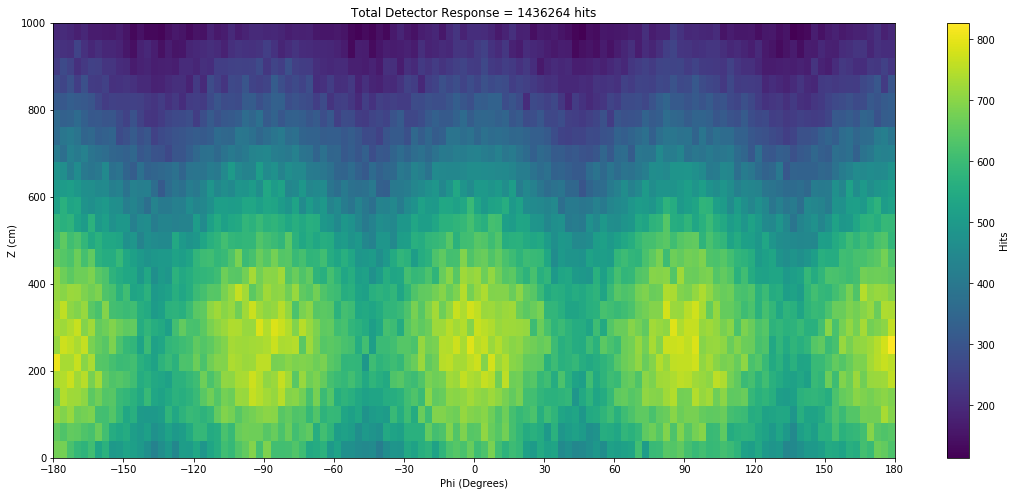

In [13]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap1, _, __ = np.histogram2d(Tot[:,7],Tot[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
im1 = plt.imshow(heatmap1.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Total Detector Response = ' + str(len(Tot)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/1Total_.png')
plt.show()

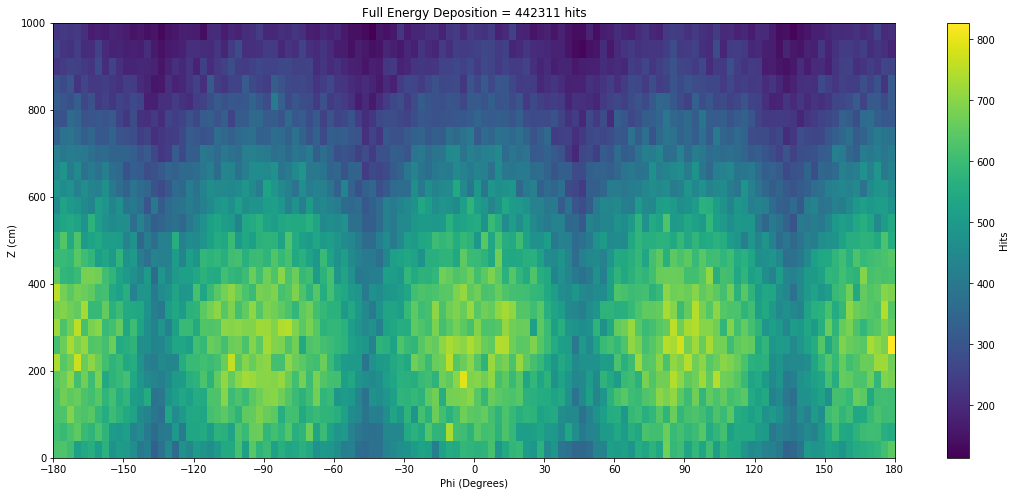

In [14]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap2, _, __ = np.histogram2d(FullE[:,7],FullE[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap2.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Full Energy Deposition = ' + str(len(FullE)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/2FullE_.png')
plt.show()

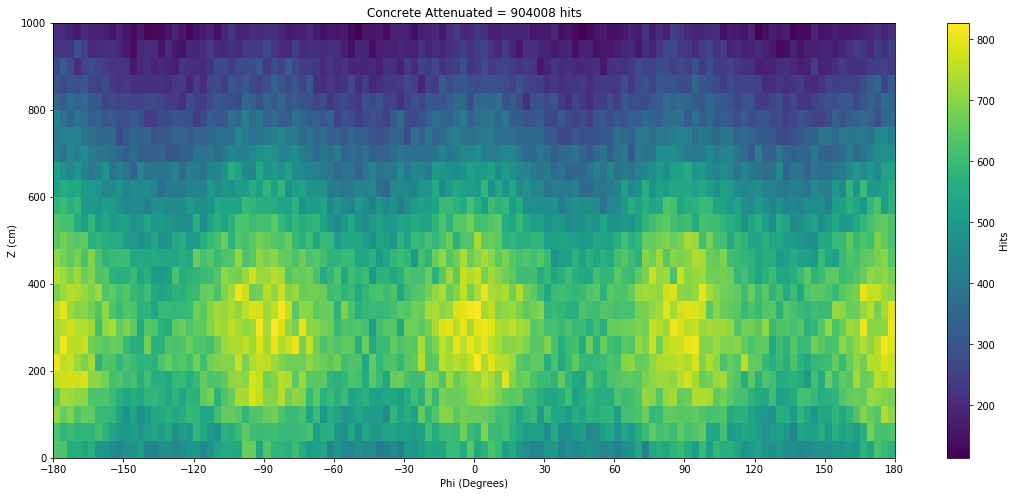

In [15]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap3, _, __ = np.histogram2d(Conc[:,7],Conc[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap3.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Concrete Attenuated = ' + str(len(Conc)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/3Concrete_Attenuated_.png')
plt.show()

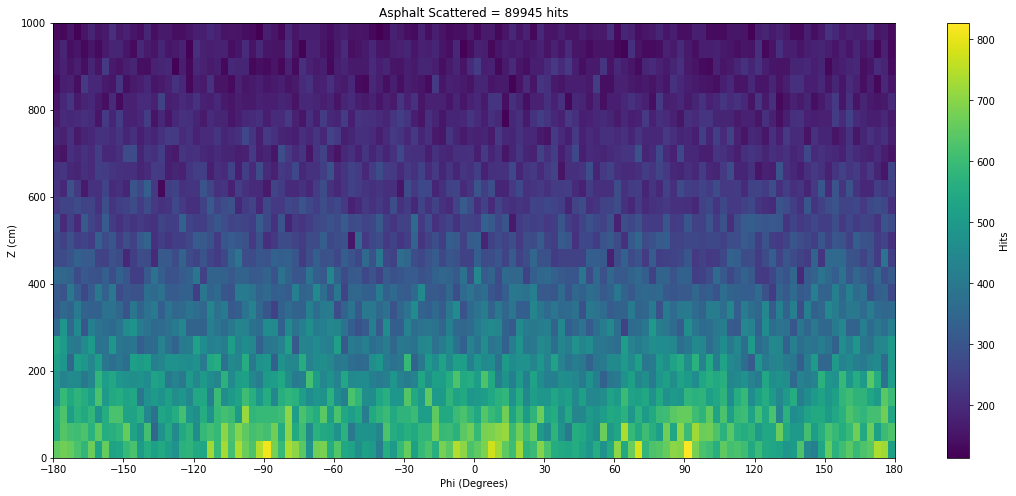

In [16]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap4, _, __ = np.histogram2d(Asph[:,7],Asph[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap4.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Asphalt Scattered = ' + str(len(Asph)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/4Asphalt_Scattered_.png')
plt.show()

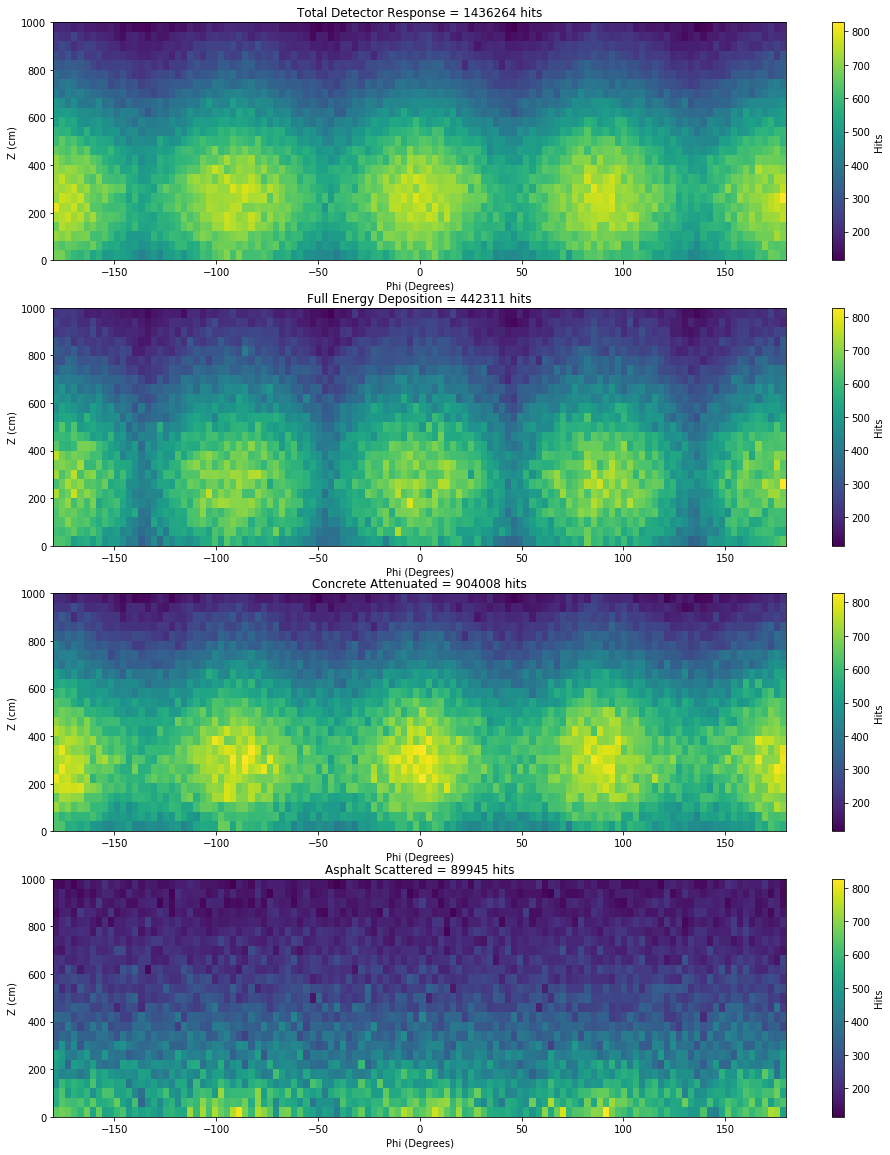

In [17]:
plt.clf()
plt.figure(figsize=(18.8496,8)) 

plt.subplot(411)
plt.imshow(heatmap1.T, extent=extent, aspect='auto', origin='lower')
plt.title('Total Detector Response = ' + str(len(Tot)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(412)
plt.imshow(heatmap2.T, extent=extent, aspect='auto', origin='lower')
plt.title('Full Energy Deposition = ' + str(len(FullE)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(413)
plt.imshow(heatmap3.T, extent=extent, aspect='auto', origin='lower')
plt.title('Concrete Attenuated = ' + str(len(Conc)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(414)
plt.imshow(heatmap4.T, extent=extent, aspect='auto', origin='lower')
plt.title('Asphalt Scattered = ' + str(len(Asph)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')

plt.subplots_adjust(bottom=0.1, right=0.8, top=2,)
plt.savefig('images/5Det_Comparison_.png', bbox_inches='tight')
plt.show()


In [18]:
"""
fig = plt.figure(figsize=(16,8))
#plt.suptitle('Am-241 Response Comparison', fontsize=16)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(FullE[:,0], FullE[:,1], FullE[:,2], s=5, c='r', marker="o",label='Full Energy')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Detector Reponse')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(FullE[:,4], FullE[:,5], FullE[:,6], s=5, c='r', marker="o",label='Full Energy')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/6FullE3D_.png')
plt.show()
"""

'\nfig = plt.figure(figsize=(16,8))\n#plt.suptitle(\'Am-241 Response Comparison\', fontsize=16)\nax = fig.add_subplot(122, projection=\'3d\')\nax.scatter(FullE[:,0], FullE[:,1], FullE[:,2], s=5, c=\'r\', marker="o",label=\'Full Energy\')\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Detector Reponse\')\nax = fig.add_subplot(121, projection=\'3d\')\nax.scatter(FullE[:,4], FullE[:,5], FullE[:,6], s=5, c=\'r\', marker="o",label=\'Full Energy\')\nax.set_xlim3d(-900,900)\nax.set_ylim3d(-900,900)\nax.set_zlim3d(-50,1000)\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Source Location\')\nplt.savefig(\'images/6FullE3D_.png\')\nplt.show()\n'

In [19]:
"""
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(Conc[:,0], Conc[:,1], Conc[:,2],s=5, c='b', marker="s",label='Concrete Attenuated')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Detector Response')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Conc[:,4], Conc[:,5], Conc[:,6],s=5, c='b', marker="s",label='Concrete Attenuated')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/7Attenuated3D_.png')
plt.show()
"""

'\nfig = plt.figure(figsize=(16,8))\nax = fig.add_subplot(122, projection=\'3d\')\nax.scatter(Conc[:,0], Conc[:,1], Conc[:,2],s=5, c=\'b\', marker="s",label=\'Concrete Attenuated\')\nax.scatter(0, 0, 250, s=15, c=\'r\', marker=\'s\', label=\'Source\')\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Detector Response\')\nax = fig.add_subplot(121, projection=\'3d\')\nax.scatter(Conc[:,4], Conc[:,5], Conc[:,6],s=5, c=\'b\', marker="s",label=\'Concrete Attenuated\')\nax.scatter(0, 0, 250, s=15, c=\'r\', marker=\'s\', label=\'Source\')\nax.set_xlim3d(-900,900)\nax.set_ylim3d(-900,900)\nax.set_zlim3d(-50,1000)\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Source Location\')\nplt.savefig(\'images/7Attenuated3D_.png\')\nplt.show()\n'

In [20]:
"""
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(Asph[:,0], Asph[:,1], Asph[:,2],s=5, c='y', marker="^",label='Asphalt Scattered')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Detector Response')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Asph[:,4], Asph[:,5], Asph[:,6],s=5, c='y', marker="^",label='Asphalt Scattered')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/8Scattered3D_.png')
plt.show()
"""

'\nfig = plt.figure(figsize=(16,8))\nax = fig.add_subplot(122, projection=\'3d\')\nax.scatter(Asph[:,0], Asph[:,1], Asph[:,2],s=5, c=\'y\', marker="^",label=\'Asphalt Scattered\')\nax.scatter(0, 0, 250, s=15, c=\'r\', marker=\'s\', label=\'Source\')\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Detector Response\')\nax = fig.add_subplot(121, projection=\'3d\')\nax.scatter(Asph[:,4], Asph[:,5], Asph[:,6],s=5, c=\'y\', marker="^",label=\'Asphalt Scattered\')\nax.scatter(0, 0, 250, s=15, c=\'r\', marker=\'s\', label=\'Source\')\nax.set_xlim3d(-900,900)\nax.set_ylim3d(-900,900)\nax.set_zlim3d(-50,1000)\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Source Location\')\nplt.savefig(\'images/8Scattered3D_.png\')\nplt.show()\n'

In [21]:
"""
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(FullE[:,0], FullE[:,1], FullE[:,2], s=5, c='r', marker="o",label='Full Energy')
ax.scatter(Conc[:,0], Conc[:,1], Conc[:,2],s=5, c='b', marker="s",label='Concrete Attenuated')
ax.scatter(Asph[:,0], Asph[:,1], Asph[:,2],s=5, c='y', marker="^",label='Asphalt Scattered')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Hit Location')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(FullE[:,4], FullE[:,5], FullE[:,6], s=5, c='r', marker="o",label='Full Energy')
ax.scatter(Conc[:,4], Conc[:,5], Conc[:,6],s=5, c='b', marker="s",label='Concrete Attenuated')
ax.scatter(Asph[:,4], Asph[:,5], Asph[:,6],s=5, c='y', marker="^",label='Asphalt Scattered')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/9Combined3D_.png')
plt.show()
"""

'\nfig = plt.figure(figsize=(16,8))\nax = fig.add_subplot(122, projection=\'3d\')\nax.scatter(FullE[:,0], FullE[:,1], FullE[:,2], s=5, c=\'r\', marker="o",label=\'Full Energy\')\nax.scatter(Conc[:,0], Conc[:,1], Conc[:,2],s=5, c=\'b\', marker="s",label=\'Concrete Attenuated\')\nax.scatter(Asph[:,0], Asph[:,1], Asph[:,2],s=5, c=\'y\', marker="^",label=\'Asphalt Scattered\')\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.set_ylabel(\'Depth (y)\')\nax.set_zlabel(\'Height (z)\')\nplt.title(\'Hit Location\')\nax = fig.add_subplot(121, projection=\'3d\')\nax.scatter(FullE[:,4], FullE[:,5], FullE[:,6], s=5, c=\'r\', marker="o",label=\'Full Energy\')\nax.scatter(Conc[:,4], Conc[:,5], Conc[:,6],s=5, c=\'b\', marker="s",label=\'Concrete Attenuated\')\nax.scatter(Asph[:,4], Asph[:,5], Asph[:,6],s=5, c=\'y\', marker="^",label=\'Asphalt Scattered\')\nax.set_xlim3d(-900,900)\nax.set_ylim3d(-900,900)\nax.set_zlim3d(-50,1000)\nplt.legend(loc=\'best\');\nax.set_xlabel(\'Width (x)\')\nax.s

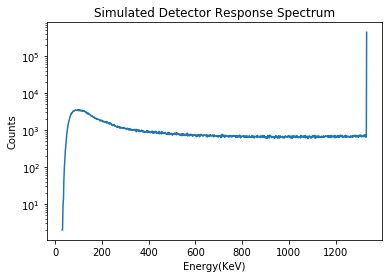

In [22]:
Spectra = np.histogram(Tot[:,3], bins=1000)
plt.semilogy(Spectra[1][1:],Spectra[0])
plt.title('Simulated Detector Response Spectrum')
plt.xlabel('Energy(KeV)')
plt.ylabel('Counts')
plt.show()

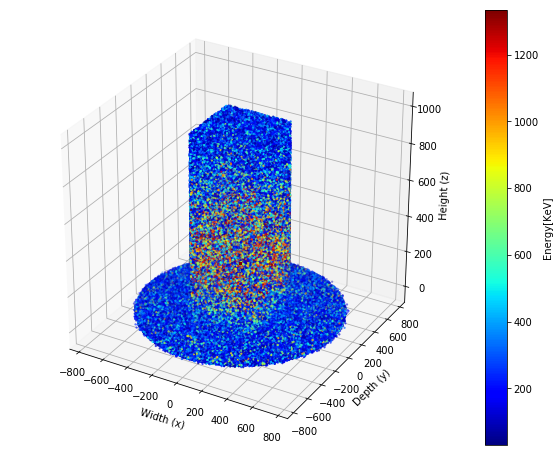

In [44]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
p = ax.scatter(Tot[:,4], Tot[:,5], Tot[:,6], c=Tot[:,3], lw=0, s=5, cmap='jet')
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
cb=fig.colorbar(p)
cb.set_label('Energy[KeV]')
plt.savefig('images/15Heatmap3D_.png')
plt.show()

In [24]:
# intersection function
def isect_line_plane_v3(p0, p1, p_co, p_no, epsilon=1e-6):
    """
    p0, p1: define the line - p0 is last point in air/material and p1 is detector interaction point
    p_co, p_no: define the plane:
        p_co is a point on the plane (plane coordinate).
        p_no is a normal vector defining the plane direction;
             (does not need to be normalized).

    return a Vector or None (when the intersection can't be found).
    """

    u = p0-p1
    dot = np.dot(p_no, u)

    if abs(dot) > epsilon:
        # the factor of the point between p0 -> p1 (0 - 1)
        # if 'fac' is between (0 - 1) the point intersects with the segment.
        # otherwise:
        #  < 0.0: behind p0.
        #  > 1.0: infront of p1.
        w = p0-p_co
        fac = -np.dot(p_no, w) / dot
        u = u*fac
        return p0+u
    else:
        # The segment is parallel to plane
        return None

In [25]:
#Defining Asphault Surface
p1 = np.array([0, -255, 0]) #Bottom Center Point
p2 = np.array([-255, 255, 0]) #Top Left Point
p3 = np.array([255, 255, 0]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 0x + 0y + 260100z = 0


In [26]:
intersections = []
for i in range(len(Asph)):
    spoint=np.array([Asph[:,4][i], Asph[:,5][i], Asph[:,6][i]])
    hpoint=np.array([Asph[:,0][i], Asph[:,1][i], Asph[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

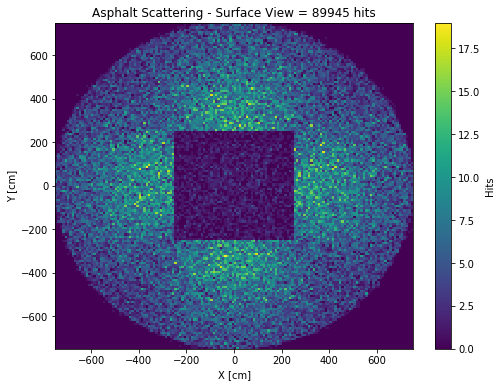

In [27]:
x,y,z = map(list,zip(*intersections))
xedges = np.arange(-750.0, 750.1, 10.)
yedges = np.arange(-750.0, 750.1, 10.)
heatmap5, _, __ = np.histogram2d(x,y, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(8,6))
plt.imshow(heatmap5.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Asphalt Scattering - Surface View = ' + str(len(Asph)) +' hits')
plt.xlabel('X [cm]')
plt.ylabel('Y [cm]')
plt.savefig('images/10Asphalt_Scattered_Surface.png')
plt.show()

In [28]:
North = Tot[(Tot[:,7]<135) & (Tot[:,7]>45) & (Tot[:,6]>0)] #Creates array of interactions in the North Wall
South = Tot[(Tot[:,7]<-45) & (Tot[:,7]>-135) & (Tot[:,6]>0)] #Creates array of interactions in the South Wall
East = Tot[(Tot[:,7]<45) & (Tot[:,7]>-45) & (Tot[:,6]>0)] #Creates array of interactions in the East Wall
West1 = Tot[(Tot[:,7]<-135) & (Tot[:,6]>0)] #Creates array of interactions in the West Wall 
West2 = Tot[(Tot[:,7]>135) & (Tot[:,6]>0)] #Creates array of interactions in the West Wall
West = np.vstack((West1,West2))

In [29]:
#Defining North Wall Surface
p1 = np.array([0, 255, 0]) #Bottom Center Point
p2 = np.array([-255, 255, 1000]) #Top Left Point
p3 = np.array([255, 255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 0x + -510000y + 0z = -130050000


In [30]:
intersections = []
for i in range(len(North)):
    spoint=np.array([North[:,4][i], North[:,5][i], North[:,6][i]])
    hpoint=np.array([North[:,0][i], North[:,1][i], North[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

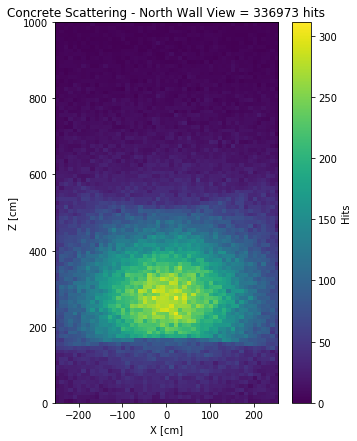

In [31]:
x,y,z = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap6, _, __ = np.histogram2d(x,z, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap6.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - North Wall View = ' + str(len(North)) +' hits')
plt.xlabel('X [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/11Concrete_Scattered_North.png')
plt.show()

In [32]:
#Defining South Wall Surface
p1 = np.array([0, -255, 0]) #Bottom Center Point
p2 = np.array([-255, -255, 1000]) #Top Left Point
p3 = np.array([255, -255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 0x + -510000y + 0z = 130050000


In [33]:
intersections = []
for i in range(len(South)):
    spoint=np.array([South[:,4][i], South[:,5][i], South[:,6][i]])
    hpoint=np.array([South[:,0][i], South[:,1][i], South[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

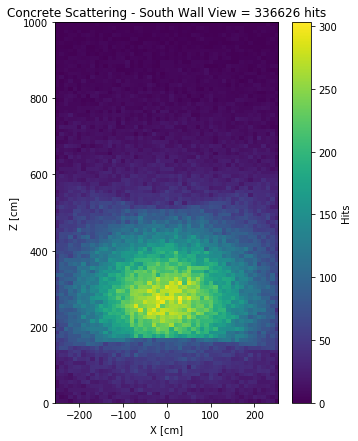

In [34]:
x,y,z = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap7, _, __ = np.histogram2d(x,z, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap7.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - South Wall View = ' + str(len(South)) +' hits')
plt.xlabel('X [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/12Concrete_Scattered_South.png')
plt.show()

In [35]:
#Defining East Wall Surface
p1 = np.array([-255, 0, 0]) #Bottom Center Point
p2 = np.array([-255, 255, 1000]) #Top Left Point
p3 = np.array([-255, -255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is -510000x + 0y + 0z = 130050000


In [36]:
intersections = []
for i in range(len(East)):
    spoint=np.array([East[:,4][i], East[:,5][i], East[:,6][i]])
    hpoint=np.array([East[:,0][i], East[:,1][i], East[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

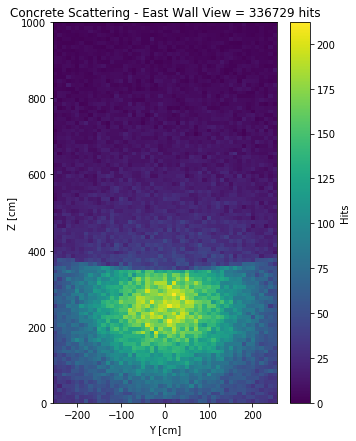

In [37]:
x,y,z = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap8, _, __ = np.histogram2d(y,z, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap8.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - East Wall View = ' + str(len(East)) +' hits')
plt.xlabel('Y [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/13Concrete_Scattered_East.png')
plt.show()

In [38]:
#Defining West Wall Surface
p1 = np.array([255, 0, 0]) #Bottom Center Point
p2 = np.array([255, -255, 1000]) #Top Left Point
p3 = np.array([255, 255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 510000x + 0y + 0z = 130050000


In [39]:
intersections = []
for i in range(len(West)):
    spoint=np.array([West[:,4][i], West[:,5][i], West[:,6][i]])
    hpoint=np.array([West[:,0][i], West[:,1][i], West[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

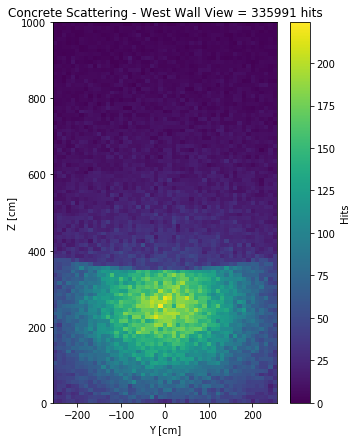

In [40]:
x,y,z = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap9, _, __ = np.histogram2d(y,z, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap9.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - West Wall View = ' + str(len(West)) +' hits')
plt.xlabel('Y [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/14Concrete_Scattered_West.png')
plt.show()